<a href="https://colab.research.google.com/github/bmnds/uea-data-science-02-python-programming/blob/master/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final da Disciplina de Programação para Ciência de Dados do Curso de Pós-Graduação em Ciência de Dados da UEA-AM
Dupla: Alberto e Bruno

## Objetivo
Auxiliar no monitoramento da saúde pública brasileira, a partir da análise de questionamentos lançados por brasileiros na plataforma Twitter. Minimamente, o trabalho fornecerá uma visão geral sobre o _dataset_ de _tweets_ coletados durante o período da pandemia, bem como os principais temas discutidos, sob a ótica temporal e espacial.

## Estrutura de tópicos do Trabalho
O trabalho foi organizado seguindo a ordem de especificação do trabalho fornecida pelo professor da disciplina.

### 1. Visão Geral
* [ ] Importar todos os **tweets** e descrevê-los
* [ ] Extrair somente as **perguntas** relacionadas ao COVID-19

#### 2. Temas Discutidos
Analisar as perguntas, sobre:
* [ ] **Doença**
* [ ] **Medicamentos**
* [ ] **Organizações**
* [ ] **Pessoas**

#### 3. Visão Temporal
* [ ] Definir o intervalo de tempo em dias, semanas ou meses
* [ ] Apresentar pelo menos duas análises temporais

#### 4. Visão Geográfica
* [ ] Definir como classificar geograficamente os dados fornecidos
* [ ] Apresentar pelo menos duas análises geográficas

## Tecnologias e Bibliotecas empregadas
* [x] Google Colaboratory
* [x] GitHub
* [x] Jupyter Notebook
* [ ] NumPy
* [ ] MatPlotLib
* [ ] Seaborn
* [ ] Plotly


#1. Visão Geral

### Inicialização do Jupyter Notebook

Bibliotecas utilizadas:
* Pandas para manipulação do _dataset_
* MatplotLib para exibição de gráficos de barra, pizza, etc.
* GeoPandas para exibição de dados espaciais

In [1]:
import pandas as pd
import matplotlib
!pip install geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

     |████████████████████████████████| 972kB 4.3MB/s 
     |████████████████████████████████| 14.8MB 304kB/s 
     |████████████████████████████████| 10.9MB 43.7MB/s 


Download do _dataset_ em formato CSV e carregamento dos dados com Pandas

In [3]:
!wget http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz
!tar -xvf dados-curso-completo.csv.tar.gz
tw=pd.read_csv("dados-curso-completo.csv")

--2020-10-23 12:50:03--  http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz
Resolving tiagodemelo.info (tiagodemelo.info)... 108.167.188.189
Connecting to tiagodemelo.info (tiagodemelo.info)|108.167.188.189|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143340808 (137M) [application/x-gzip]
Saving to: ‘dados-curso-completo.csv.tar.gz.1’

dados-curso-complet 100%[===================>] 136.70M  7.33MB/s    in 20s     

2020-10-23 12:50:23 (7.00 MB/s) - ‘dados-curso-completo.csv.tar.gz.1’ saved [143340808/143340808]

dados-curso-completo.csv


### Exploração dos dados

O dataset importado contém **13 colunas**, sendo 5 referentes à localização geográfica: lugar; país; sigla; latitude; e longitude. Para a finalidade deste trabalho, as colunas **usuario** e **apelido** não são importantes e, portanto, serão excluídas na etapa de pré-processamento.

In [5]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658825 entries, 0 to 1658824
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   data        1658825 non-null  object 
 1   usuario     1658768 non-null  object 
 2   apelido     1658825 non-null  object 
 3   texto       1658825 non-null  object 
 4   retweet     1658825 non-null  int64  
 5   seguidores  1658825 non-null  int64  
 6   idioma      1658825 non-null  object 
 7   lugar       74605 non-null    object 
 8   pais        74600 non-null    object 
 9   sigla       74595 non-null    object 
 10  latitude    8720 non-null     float64
 11  longitude   8720 non-null     float64
 12  hashtags    1658825 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 164.5+ MB


Há um total de **1.658.825** tweets no dataset fornecido, dos quais apenas **8.720** possuem latitude e longitude preenchidas, destes, aproximadamente **50%** foi postado a partir da região Sudeste do Brasil.

In [4]:
tw.describe()

,retweet,seguidores,latitude,longitude
count,1.658825e+06,1.658825e+06,8720.000000,8720.000000
mean,1.978533e+02,3.257206e+04,-40.237583,-11.117100
std,6.337641e+03,3.680300e+05,20.808494,19.169105
min,0.000000e+00,0.000000e+00,-123.120400,-37.818769
25%,0.000000e+00,1.010000e+02,-47.864334,-23.305300
50%,0.000000e+00,3.800000e+02,-43.955615,-19.624400
75%,0.000000e+00,1.470000e+03,-38.453198,-7.120700
max,1.139763e+06,8.424125e+07,174.789310,58.257776


In [10]:
tw.iloc[1000000:]

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
1000000,2020-03-27 22:28:06,Jackson Kestring,JacksonKestring,@travfer1 @cafecomferri A malária é transmitid...,0,20,pt,NaN,NaN,NaN,NaN,NaN,[]
1000001,2020-06-17 18:53:49,𝕻𝖗𝖎𝖘𝖈𝖎𝖑𝖑𝖆,Priszzb,"@TrottaPedro Sim, mas to falando que muitos da...",0,147,pt,NaN,NaN,NaN,NaN,NaN,[]
1000002,2020-06-29 21:10:06,Vinicius Cordeiro,vinacordeiros,rolando boatos FORTES que o lockdown será decr...,1,497,pt,NaN,NaN,NaN,NaN,NaN,[]
1000003,2020-04-02 20:54:41,Lúcia de Azevedo. \🇧🇷🇵🇹🇮🇱🇺🇸/,luciaazevedo,"@jairbolsonaro Roubaram os valores morais, fam...",2,1643,pt,NaN,NaN,NaN,NaN,NaN,[]
1000004,2020-04-16 20:00:28,Mateus🇧🇷,mxcteus,Se hoje em dia com toda a informação que temos...,3,2465,pt,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658820,2020-03-13 17:26:18,broca,whoisdrill,oms: tamo tendo pandemia evitar\n conglomerado...,0,361,pt,NaN,NaN,NaN,NaN,NaN,[]
1658821,2020-05-12 13:02:34,Renato 🇧🇷,VerdadeExpress,"@OsmarTerra Sr. Osmar Terra, gostaria de ouvir...",0,4066,pt,NaN,NaN,NaN,NaN,NaN,[]
1658822,2020-03-19 18:16:30,eugeniocosta8,EugenioCosta8,CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...,3,5307,pt,NaN,NaN,NaN,NaN,NaN,['CORONAVIRUS']
1658823,2020-04-07 18:14:45,Wagner Mota - Seriedade + Geek,wagnermota75,"#BolsonaroTemRazaoSim porque, quando a prefeit...",0,1000,pt,NaN,NaN,NaN,NaN,NaN,['BolsonaroTemRazaoSim']


Os tweets são referentes ao período de 01/01/2020 a 28/07/2020.

In [15]:
tw_datas = tw.filter(items=['data'])
print(tw_datas.min())
print(tw_datas.max())

data    2020-01-01 00:42:12
dtype: object
data    2020-07-28 17:19:44
dtype: object


O foco deste trabalho é analisar dados do Brasil, e, portanto, tweets em outros idiomas serão descartados na fase de processamento dos dados.

pt    1586796
en      23991
es      14255
Name: idioma, dtype: int64


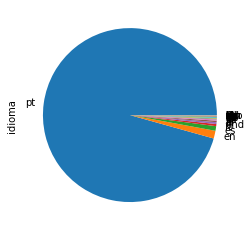

In [50]:
print(tw.idioma.value_counts().nlargest(3))
tw.idioma.value_counts().plot(kind='pie')

In [51]:
tw[tw.idioma.eq('en')].texto

24         RT @DurhamCatholic: If you’re feeling disconne...
36         RT @ddale8: Trump continues that it's fine if ...
40                              @LaurenJauregui YESSS LAUREN
110        RT @chartdata: Current top 10 singles on US iT...
191        RT @emel0371: When quarantine is over 😂\n( cre...
                                 ...                        
1658642    RT @katewalsh: my plans                       ...
1658675    @neilmoysey @piersmorgan @BorisJohnson But Cum...
1658731    Hadley has been prescribed antibiotics as he h...
1658752    RT @rudy_betrayed: me: hey can we have sex in ...
1658811    Franklin Duration Income Trust : Universal Tru...
Name: texto, Length: 23991, dtype: object

Há 74.600 tweets com a informação do País preenchida, destes, **90%** são do Brasil.

Total de tweets com País preenchido: 74600
Porcentagem BR: 90.14343163538874


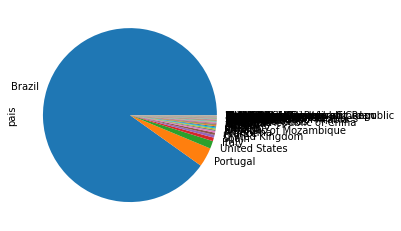

In [42]:
print('Total de tweets com País preenchido: ' + str(tw.pais.count()))
tw_pais_counts = tw.pais.value_counts()
print('Porcentagem BR: ' + str(tw_pais_counts['Brazil']/tw.pais.count()*100))
tw_pais_counts.plot(kind='pie')

### Pré-Processamento

A coluna **data** não está com o tipo _datetime_ e precisa ser ajustada para podermos realizar análises temporais. Após o ajuste foi possível plotar o histograma. Podemos constatar que a maioria dos tweets foi postada no período compreendido entre o final de março e a primeira metade de abril, coincidindo com a época em que o Brasil atingiu a marca dos 100.000 casos de COVID-19.

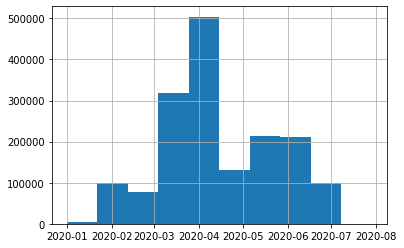

In [59]:
tw.data = pd.to_datetime(tw.data)
tw.data.hist()

Apenas os dados no idioma **pt** interessam para nossa análise, então os demais serão removidos do dataset.

In [79]:
tw = tw[tw.idioma.eq('pt')]

Para viabilizar análises espaciais, precisamos criar uma coluna do tipo _geometry_ no dataset e remover as colunas originais de latitude e longitude. Após adição da coluna, foi possível plotar um mapa com os tweets. Apesar de termos visto anteriormente que a grande maioria dos tweets foram originados na região Sudeste, o mapa abaixo ilustra que a amostragem possui tweets de praticamente todas as regiões do Brasil.

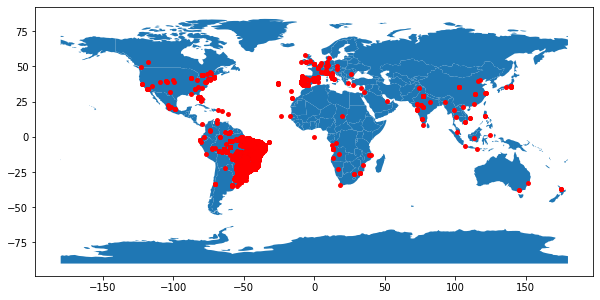

In [82]:
if 'geometry' not in tw.columns:
  geometry = [Point(xy) for xy in zip(tw['latitude'], tw['longitude'])]
  tw = GeoDataFrame(tw, geometry=geometry)
if 'geometry' in tw.columns:
  if 'longitude' in tw.columns:
    del tw['longitude']
  if 'latitude' in tw.columns:
    del tw['latitude']

# plotagem do mapa mundi usando a lib GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
tw.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

As colunas **usuario** e **apelido** não são importantes para o objetivo deste trabalho e, portanto, devem ser descartadas.

In [83]:
if 'usuario' in tw.columns:
  del tw['usuario']
if 'apelido' in tw.columns:
  del tw['apelido']
tw.dtypes

data          datetime64[ns]
texto                 object
retweet                int64
seguidores             int64
idioma                object
lugar                 object
pais                  object
sigla                 object
hashtags              object
geometry            geometry
dtype: object

### Extração das Perguntas

In [85]:
import re # lib para trabalhar com expressões regulares
new_tweets = []
for tweet in tw.itertuples(index=False):
    sentences = re.findall('[^[?|!|.|;]+]*[?|!|.|;]', tweet.texto)
    questions = list(filter(lambda x: x.endswith('?'), sentences))
    for question in questions:
      new_tweet = ((tweet.data,) + (question,) + (tweet.retweet,
                                                  tweet.seguidores,
                                                  tweet.idioma,
                                                  tweet.lugar,
                                                  tweet.pais,
                                                  tweet.sigla,
                                                  tweet.hashtags,
                                                  tweet.geometry))
      new_tweets.append(new_tweet) 
DuvidasDB = GeoDataFrame(new_tweets, columns = ['data', 'duvida', 'retweet', 'seguidores', 'idioma', 'lugar', 'pais', 'sigla', 'hashtags', 'geometry'])
del new_tweets
DuvidasDB.head()

/usr/local/lib/python3.6/dist-packages/geopandas/array.py:689: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/usr/local/lib/python3.6/dist-packages/geopandas/array.py:690: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/usr/local/lib/python3.6/dist-packages/geopandas/array.py:691: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/usr/local/lib/python3.6/dist-packages/geopandas/array.py:692: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy
/usr/local/lib/python3.6/dist-packages/geopandas/array.py:689: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/usr/local/lib/python3.6/dist-packages/geopandas/array.py:690: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/usr/local/lib/python3.6/dist-packages/geopandas/array.py:691: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/usr/local/lib/python3.6/dist-packages/geopandas/array.

,data,duvida,retweet,seguidores,idioma,lugar,pais,sigla,hashtags,geometry
0,2020-03-23 18:51:14,@BolsonaroSP Cade o fundão deputado?,0,138,pt,NaN,NaN,NaN,[],POINT (nan nan)
1,2020-04-01 21:11:07,Fumaça de cigarro pode propagar coronavírus?,0,1885,pt,NaN,NaN,NaN,[],POINT (nan nan)
2,2020-06-25 11:09:19,@ipratesMD @dr_pampers Será que corremos o ris...,0,86,pt,NaN,NaN,NaN,[],POINT (nan nan)
3,2020-04-06 15:44:36,Prioridade ?,0,219,pt,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']",POINT (nan nan)
4,2020-03-30 00:43:36,"Que tal uma notícia boa, indo na contramão do ...",0,201,pt,NaN,NaN,NaN,[],POINT (nan nan)


Após a extração, foram totalizadas **189.998** dúvidas.

In [86]:
DuvidasDB.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 189998 entries, 0 to 189997
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   data        189998 non-null  datetime64[ns]
 1   duvida      189998 non-null  object        
 2   retweet     189998 non-null  int64         
 3   seguidores  189998 non-null  int64         
 4   idioma      189998 non-null  object        
 5   lugar       8649 non-null    object        
 6   pais        8649 non-null    object        
 7   sigla       8649 non-null    object        
 8   hashtags    189998 non-null  object        
 9   geometry    189998 non-null  geometry      
dtypes: datetime64[ns](1), geometry(1), int64(2), object(6)
memory usage: 14.5+ MB


Dentre as perguntas repetidas, aquelas referentes à **quarentena** lideram o ranking, seguidas por **álcool gel** e **cloroquina**.

In [98]:
DuvidasDB.duvida.value_counts().nlargest(10)

quarentena dia ?                             276
dia ?                                        223
Dia ?                                        188
 ?                                           180
covid 19?                                    167
Quarentena dia ?                             146
 O álcool gel na mira do marketing?          144
CLOROQUINA : POR QUE A TV ESCONDE A CURA?     93
Olá pessoal, tudo bem?                        86
 Será?                                        86
Name: duvida, dtype: int64